In [3]:
# Load EEG features
eeg_df = pd.read_excel(r'C:\Users\bibek\Downloads\PROJECT2\correlation2\ANGRYeeg_features_combined.xlsx')

# Load digital image features
image_df = pd.read_excel(r'C:\Users\bibek\Downloads\PROJECT2\correlation2\DIGITALangry.xlsx')


Correlation results saved to 'correlation_results.csv'


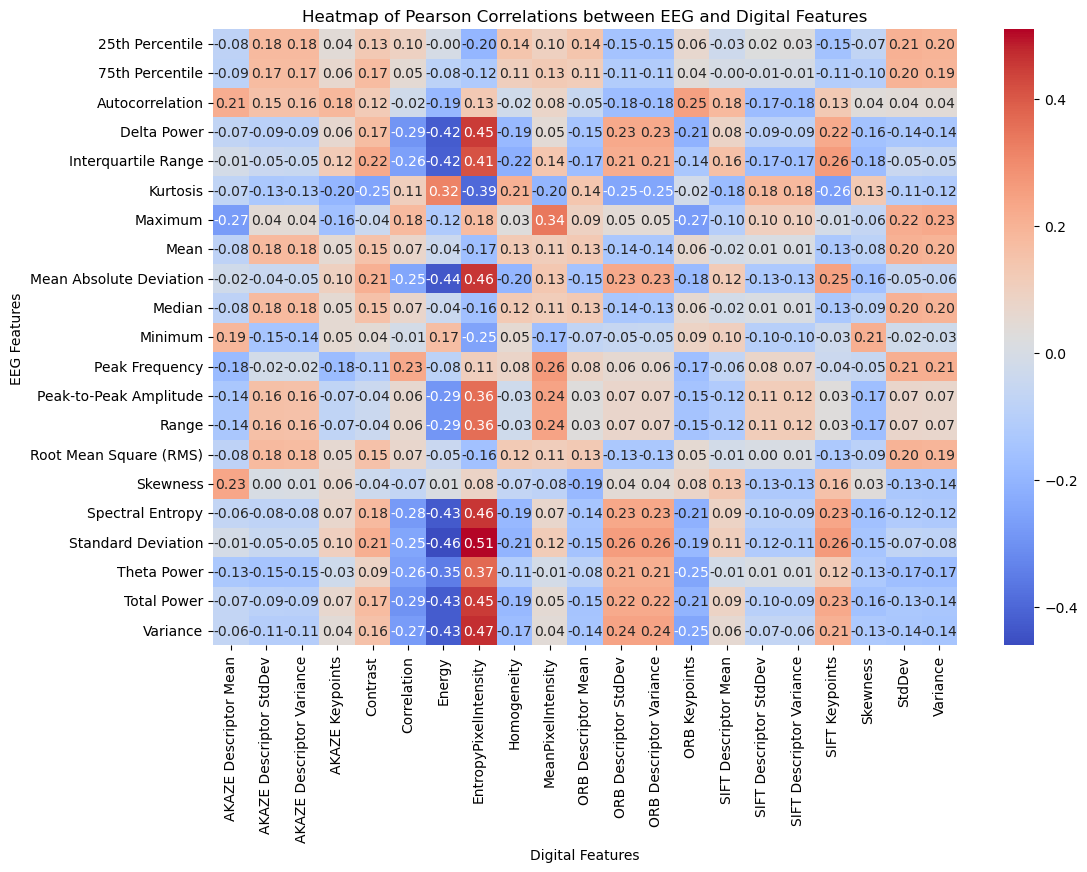

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\HAPPYeeg_features_combined.xlsx"
digital_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\happydigital.xlsx"

# Load EEG and Digital Image features
eeg_features = pd.read_excel(eeg_path)
digital_features = pd.read_excel(digital_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
digital_features.fillna(digital_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == digital_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
digital_features_numeric = digital_features.select_dtypes(include=['number'])

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis
for eeg_col in eeg_features_numeric.columns:
    for digi_col in digital_features_numeric.columns:
        try:
            # Check if columns have constant values (invalid for correlation)
            if eeg_features_numeric[eeg_col].nunique() <= 1 or digital_features_numeric[digi_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Digital Feature': digi_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {digi_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to CSV
correlation_df.to_csv("correlation_results.csv", index=False)
print("Correlation results saved to 'correlation_results.csv'")

# 🔥 Fix heatmap issue by pivoting the DataFrame dynamically
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Digital Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Digital Features")
    plt.xlabel("Digital Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\fused_data.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\correlation_results.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                 EEG Feature        Digital Feature  Pearson_r   P_value
28        Standard Deviation  EntropyPixelIntensity   0.509448  0.000351
49                  Variance  EntropyPixelIntensity   0.468219  0.001180
406         Spectral Entropy  EntropyPixelIntensity   0.460008  0.001476
259  Mean Absolute Deviation  EntropyPixelIntensity   0.456486  0.001622
343              Total Power  EntropyPixelIntensity   0.450590  0.001896
364              Delta Power  EntropyPixelIntensity   0.450239  0.001913
238      Interquartile Range  EntropyPixelIntensity   0.412614  0.004852
385              Theta Power  EntropyPixelIntensity   0.372057  0.011847
154                    Range  EntropyPixelIntensity   0.360528  0.014979
301   Peak-to-Peak Amplitude  Entro

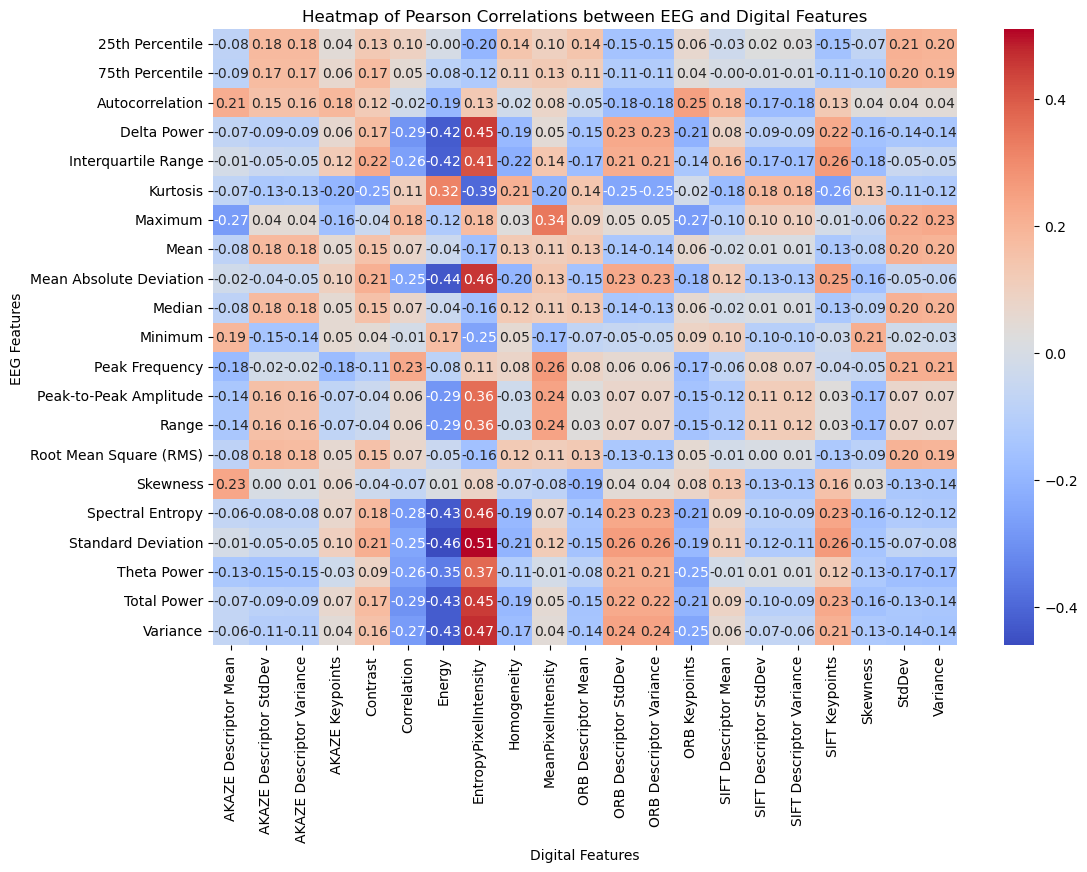

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\HAPPYeeg_features_combined.xlsx"
digital_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\happydigital.xlsx"
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\correlation_results.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\fused_data.xlsx"

# Load EEG and Digital Image features
eeg_features = pd.read_excel(eeg_path)
digital_features = pd.read_excel(digital_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
digital_features.fillna(digital_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == digital_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
digital_features_numeric = digital_features.select_dtypes(include=['number'])

# Fuse EEG and Digital Image Data Together
fused_data = pd.concat([eeg_features_numeric, digital_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis
for eeg_col in eeg_features_numeric.columns:
    for digi_col in digital_features_numeric.columns:
        try:
            # Check if columns have constant values (invalid for correlation)
            if eeg_features_numeric[eeg_col].nunique() <= 1 or digital_features_numeric[digi_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Digital Feature': digi_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {digi_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Digital Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Fix heatmap issue by pivoting the DataFrame dynamically
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Digital Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Digital Features")
    plt.xlabel("Digital Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\sadfused_data.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\sadcorrelation_results.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature        Digital Feature  Pearson_r   P_value
72                 Skewness          ORB Keypoints   0.297481  0.042282
324         Autocorrelation          ORB Keypoints   0.269033  0.067458
73                 Skewness    ORB Descriptor Mean   0.258051  0.079900
207         25th Percentile  AKAZE Descriptor Mean   0.213200  0.150187
18                     Mean  AKAZE Descriptor Mean   0.212810  0.150952
186                  Median  AKAZE Descriptor Mean   0.212498  0.151567
291  Root Mean Square (RMS)  AKAZE Descriptor Mean   0.212091  0.152370
228         75th Percentile  AKAZE Descriptor Mean   0.210342  0.155860
332         Autocorrelation        AKAZE Keypoints   0.203069  0.171000
382             Theta Power     MeanPix

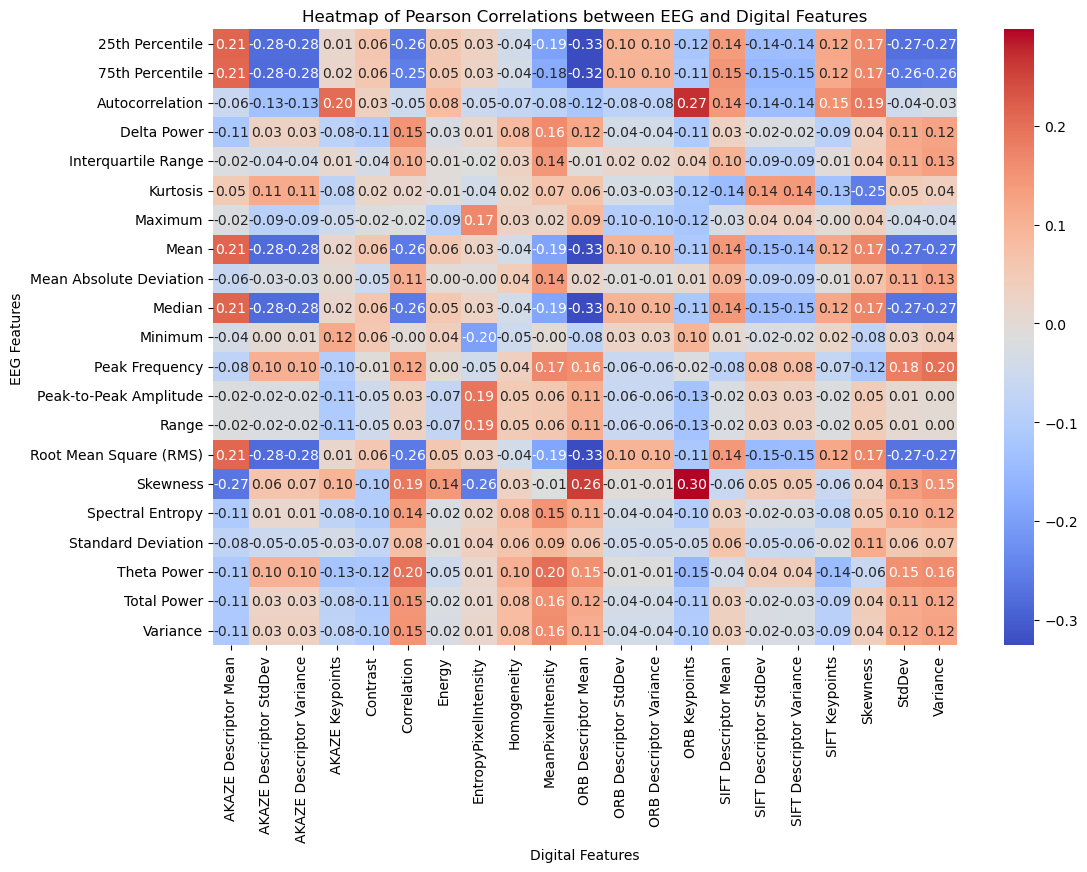

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\SADeeg_features_combined.xlsx"
digital_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\saddigital.xlsx"
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\sadcorrelation_results.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\sadfused_data.xlsx"

# Load EEG and Digital Image features
eeg_features = pd.read_excel(eeg_path)
digital_features = pd.read_excel(digital_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
digital_features.fillna(digital_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == digital_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
digital_features_numeric = digital_features.select_dtypes(include=['number'])

# Fuse EEG and Digital Image Data Together
fused_data = pd.concat([eeg_features_numeric, digital_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis
for eeg_col in eeg_features_numeric.columns:
    for digi_col in digital_features_numeric.columns:
        try:
            # Check if columns have constant values (invalid for correlation)
            if eeg_features_numeric[eeg_col].nunique() <= 1 or digital_features_numeric[digi_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Digital Feature': digi_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {digi_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Digital Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Fix heatmap issue by pivoting the DataFrame dynamically
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Digital Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Digital Features")
    plt.xlabel("Digital Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\normalfused_data.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\normalcorrelation_results.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature       Digital Feature  Pearson_r   P_value
379             Theta Power                Energy   0.404822  0.005809
43                 Variance                Energy   0.376451  0.010810
358             Delta Power                Energy   0.373325  0.011539
400        Spectral Entropy                Energy   0.365744  0.013484
337             Total Power                Energy   0.363523  0.014105
219         75th Percentile         ORB Keypoints   0.353185  0.017321
329         Autocorrelation  SIFT Descriptor Mean   0.346250  0.019809
22       Standard Deviation                Energy   0.344566  0.020457
282  Root Mean Square (RMS)         ORB Keypoints   0.329736  0.026969
29       Standard Deviation              Sk

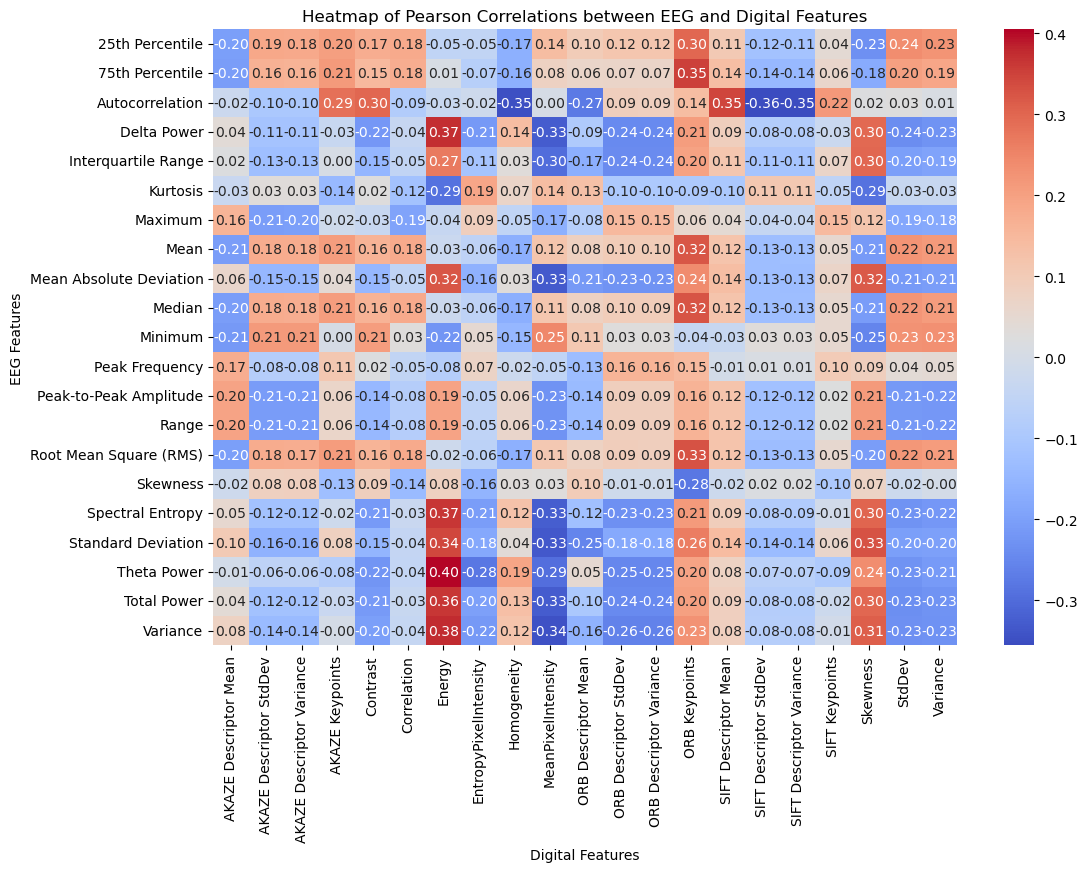

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\NORMALeeg_features_combined.xlsx"
digital_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\normaldigital.xlsx"
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\normalcorrelation_results.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\normalfused_data.xlsx"

# Load EEG and Digital Image features
eeg_features = pd.read_excel(eeg_path)
digital_features = pd.read_excel(digital_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
digital_features.fillna(digital_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == digital_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
digital_features_numeric = digital_features.select_dtypes(include=['number'])

# Fuse EEG and Digital Image Data Together
fused_data = pd.concat([eeg_features_numeric, digital_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis
for eeg_col in eeg_features_numeric.columns:
    for digi_col in digital_features_numeric.columns:
        try:
            # Check if columns have constant values (invalid for correlation)
            if eeg_features_numeric[eeg_col].nunique() <= 1 or digital_features_numeric[digi_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Digital Feature': digi_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {digi_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Digital Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Fix heatmap issue by pivoting the DataFrame dynamically
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Digital Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Digital Features")
    plt.xlabel("Digital Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\angryfused_data.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\angrycorrelation_results.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature          Digital Feature  Pearson_r   P_value
332         Autocorrelation          AKAZE Keypoints   0.532495  0.000098
423          Peak Frequency              Correlation   0.416934  0.003198
328         Autocorrelation           SIFT Keypoints   0.383957  0.007057
329         Autocorrelation     SIFT Descriptor Mean   0.364149  0.010946
137                 Minimum    ORB Descriptor StdDev   0.319494  0.026860
138                 Minimum  ORB Descriptor Variance   0.319202  0.027008
379             Theta Power                   Energy   0.300283  0.038107
227         75th Percentile          AKAZE Keypoints   0.295924  0.041135
239     Interquartile Range                 Skewness   0.289773  0.045741
290  Root Mean 

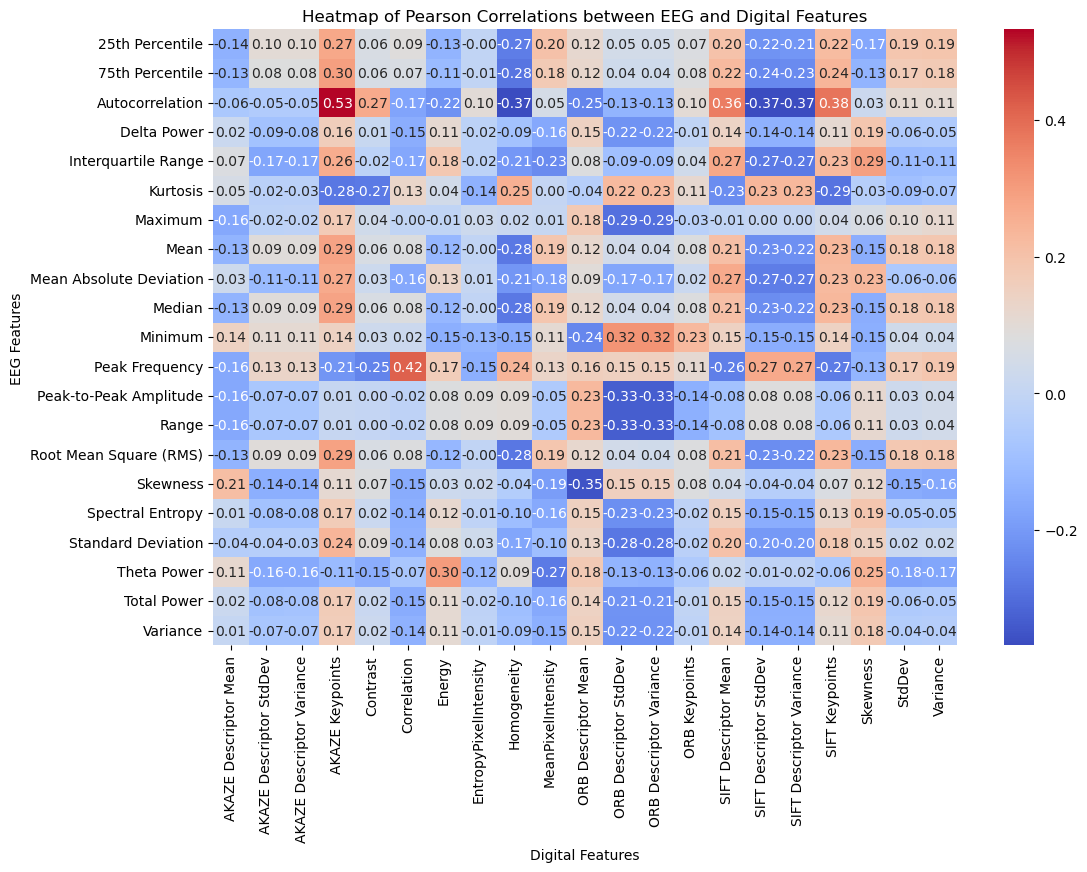

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\ANGRYeeg_features_combined.xlsx"
digital_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\angrydigital.xlsx"
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\angrycorrelation_results.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\angryfused_data.xlsx"

# Load EEG and Digital Image features
eeg_features = pd.read_excel(eeg_path)
digital_features = pd.read_excel(digital_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
digital_features.fillna(digital_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == digital_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
digital_features_numeric = digital_features.select_dtypes(include=['number'])

# Fuse EEG and Digital Image Data Together
fused_data = pd.concat([eeg_features_numeric, digital_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis
for eeg_col in eeg_features_numeric.columns:
    for digi_col in digital_features_numeric.columns:
        try:
            # Check if columns have constant values (invalid for correlation)
            if eeg_features_numeric[eeg_col].nunique() <= 1 or digital_features_numeric[digi_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Digital Feature': digi_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {digi_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Digital Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Fix heatmap issue by pivoting the DataFrame dynamically
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Digital Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Digital Features")
    plt.xlabel("Digital Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\fearfused_data.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\fearcorrelation_results.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature      Digital Feature  Pearson_r   P_value
106                 Maximum               Energy   0.354552  0.016863
136                 Minimum  ORB Descriptor Mean   0.326108  0.028802
430          Peak Frequency  ORB Descriptor Mean   0.315244  0.034917
424          Peak Frequency   MeanPixelIntensity   0.289763  0.053515
94                 Kurtosis  ORB Descriptor Mean   0.265686  0.077736
295  Peak-to-Peak Amplitude               Energy   0.255716  0.089991
148                   Range               Energy   0.255716  0.089991
425          Peak Frequency               StdDev   0.252915  0.093692
211         75th Percentile               Energy   0.248116  0.100303
426          Peak Frequency             Variance   0.2446

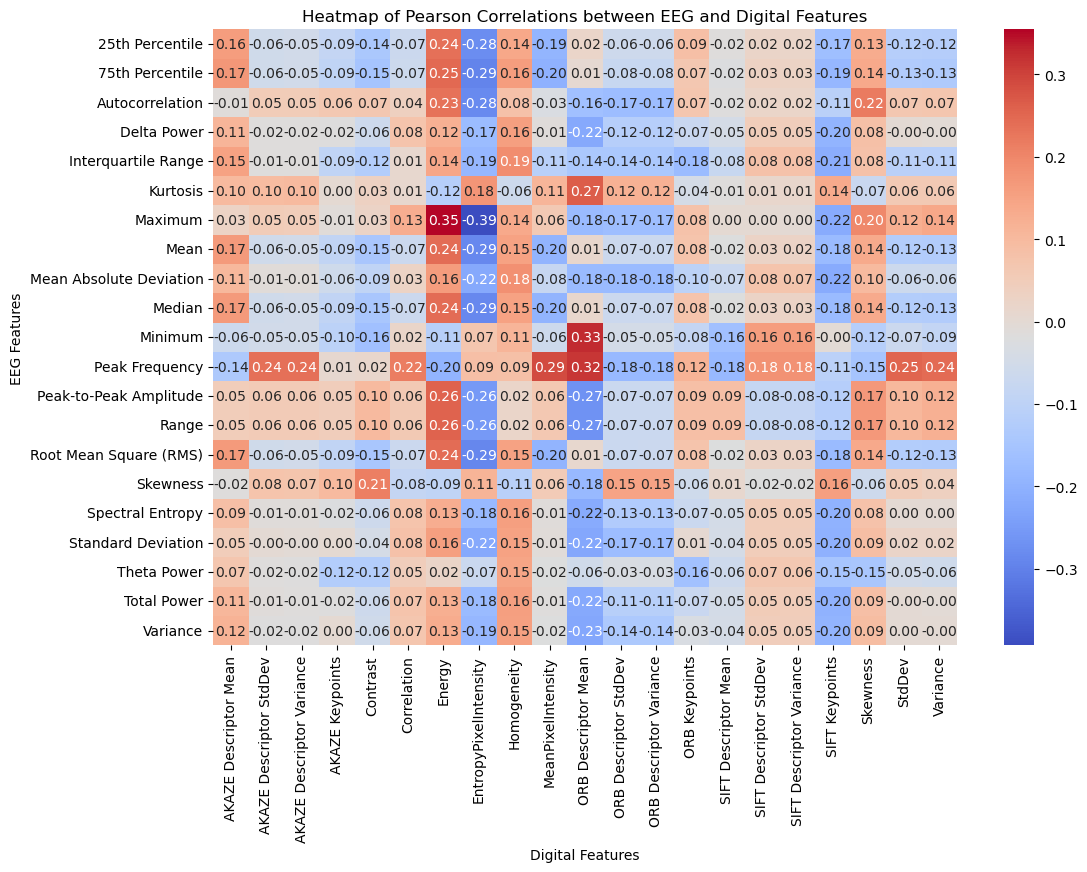

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\FEAReeg_features_combined.xlsx"
digital_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\feardigital.xlsx"
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\fearcorrelation_results.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\fearfused_data.xlsx"

# Load EEG and Digital Image features
eeg_features = pd.read_excel(eeg_path)
digital_features = pd.read_excel(digital_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
digital_features.fillna(digital_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == digital_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
digital_features_numeric = digital_features.select_dtypes(include=['number'])

# Fuse EEG and Digital Image Data Together
fused_data = pd.concat([eeg_features_numeric, digital_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis
for eeg_col in eeg_features_numeric.columns:
    for digi_col in digital_features_numeric.columns:
        try:
            # Check if columns have constant values (invalid for correlation)
            if eeg_features_numeric[eeg_col].nunique() <= 1 or digital_features_numeric[digi_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Digital Feature': digi_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {digi_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Digital Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Fix heatmap issue by pivoting the DataFrame dynamically
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Digital Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Digital Features")
    plt.xlabel("Digital Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\surprisefused_data.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\surprisecorrelation_results.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature          Digital Feature  Pearson_r   P_value
305  Peak-to-Peak Amplitude    ORB Descriptor StdDev   0.330473  0.020386
158                   Range    ORB Descriptor StdDev   0.330473  0.020386
306  Peak-to-Peak Amplitude  ORB Descriptor Variance   0.330121  0.020528
159                   Range  ORB Descriptor Variance   0.330121  0.020528
123                 Maximum    AKAZE Descriptor Mean   0.299485  0.036571
32       Standard Deviation    ORB Descriptor StdDev   0.288003  0.044780
33       Standard Deviation  ORB Descriptor Variance   0.287608  0.045087
88                 Kurtosis       MeanPixelIntensity   0.277627  0.053437
312  Peak-to-Peak Amplitude    AKAZE Descriptor Mean   0.271022  0.059619
165      

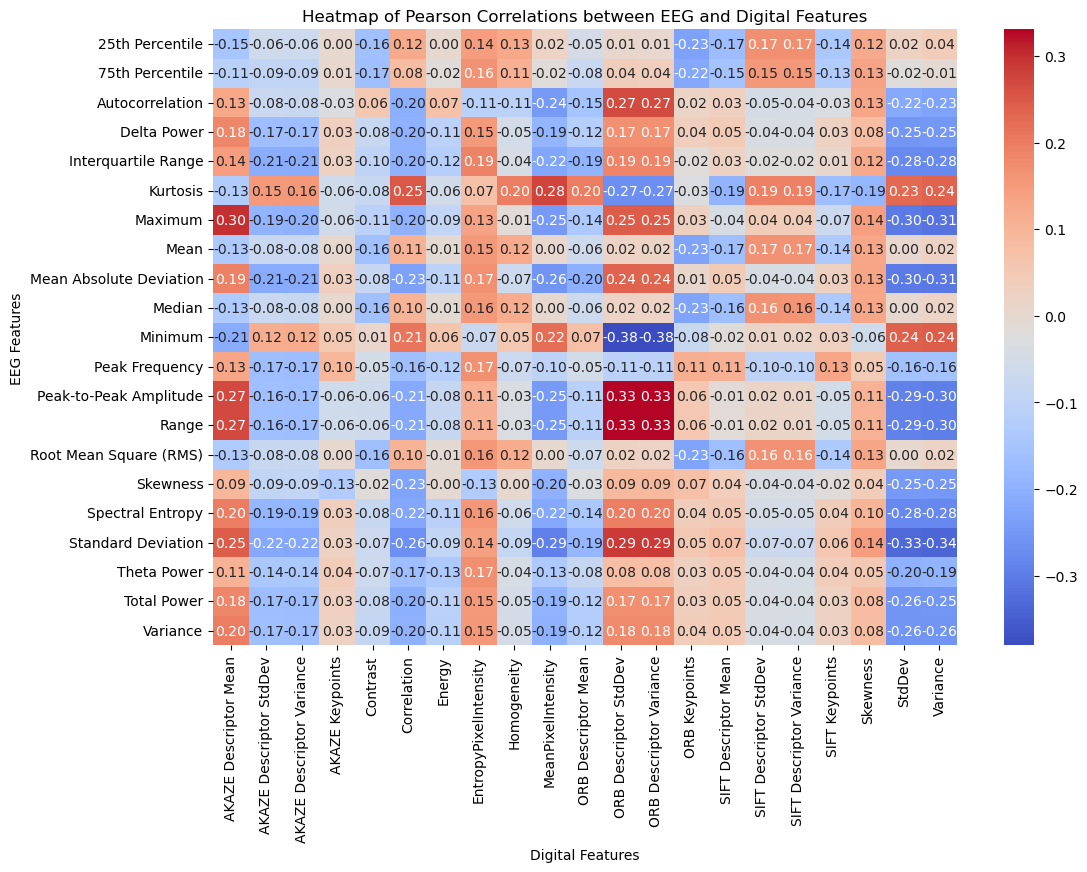

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\SURPRISEeeg_features_combined.xlsx"
digital_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\surprisedigital.xlsx"
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\surprisecorrelation_results.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\surprisefused_data.xlsx"

# Load EEG and Digital Image features
eeg_features = pd.read_excel(eeg_path)
digital_features = pd.read_excel(digital_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
digital_features.fillna(digital_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == digital_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
digital_features_numeric = digital_features.select_dtypes(include=['number'])

# Fuse EEG and Digital Image Data Together
fused_data = pd.concat([eeg_features_numeric, digital_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis
for eeg_col in eeg_features_numeric.columns:
    for digi_col in digital_features_numeric.columns:
        try:
            # Check if columns have constant values (invalid for correlation)
            if eeg_features_numeric[eeg_col].nunique() <= 1 or digital_features_numeric[digi_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], digital_features_numeric[digi_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Digital Feature': digi_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {digi_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Digital Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Fix heatmap issue by pivoting the DataFrame dynamically
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Digital Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Digital Features")
    plt.xlabel("Digital Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\surprisefused_data_eeg_thermal.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\surprisecorrelation_results_eeg_thermal.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                 EEG Feature  Thermal Feature  Pearson_r   P_value
385              Theta Power          Entropy   0.605362  0.000004
364              Delta Power          Entropy   0.596728  0.000006
343              Total Power          Entropy   0.596263  0.000006
49                  Variance          Entropy   0.584276  0.000010
406         Spectral Entropy          Entropy   0.574263  0.000016
238      Interquartile Range          Entropy   0.537546  0.000068
340              Total Power  MeanTemperature   0.520771  0.000125
361              Delta Power  MeanTemperature   0.520459  0.000126
46                  Variance  MeanTemperature   0.509077  0.000187
259  Mean Absolute Deviatio

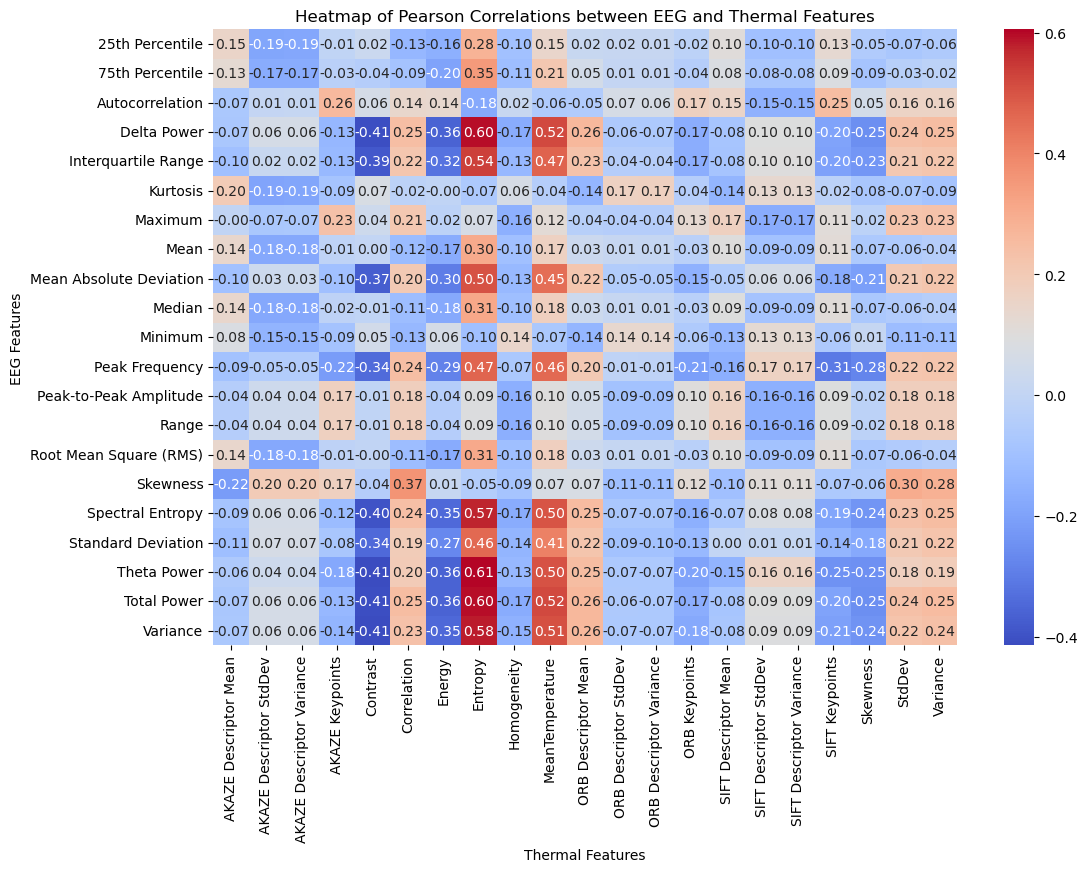

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\SURPRISEeeg_features_combined.xlsx"
thermal_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\thermal\surprise_thermal_extracted_features.xlsx"

# Save paths for correlation results and fused data
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\surprisecorrelation_results_eeg_thermal.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\surprisefused_data_eeg_thermal.xlsx"

# Load EEG and Thermal features
eeg_features = pd.read_excel(eeg_path)
thermal_features = pd.read_excel(thermal_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
thermal_features.fillna(thermal_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == thermal_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
thermal_features_numeric = thermal_features.select_dtypes(include=['number'])

# Fuse EEG and Thermal Data Together
fused_data = pd.concat([eeg_features_numeric, thermal_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis between EEG and Thermal features
for eeg_col in eeg_features_numeric.columns:
    for thermal_col in thermal_features_numeric.columns:
        try:
            if eeg_features_numeric[eeg_col].nunique() <= 1 or thermal_features_numeric[thermal_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Thermal Feature': thermal_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {thermal_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Thermal Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Heatmap of correlations
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Thermal Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Thermal Features")
    plt.xlabel("Thermal Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\angryfused_data_eeg_thermal.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\angrycorrelation_results_eeg_thermal.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
         EEG Feature            Thermal Feature  Pearson_r   P_value
66          Skewness                Correlation   0.523539  0.000224
70          Skewness                    Entropy   0.377364  0.010605
68          Skewness                     StdDev   0.364876  0.013724
320  Autocorrelation                     StdDev   0.343272  0.020967
318  Autocorrelation                Correlation   0.341023  0.021878
321  Autocorrelation                   Variance   0.340177  0.022229
125          Maximum  AKAZE Descriptor Variance   0.326946  0.028369
124          Maximum    AKAZE Descriptor StdDev   0.326927  0.028379
67          Skewness            MeanTemperature   0.317585  0.033516
69          S

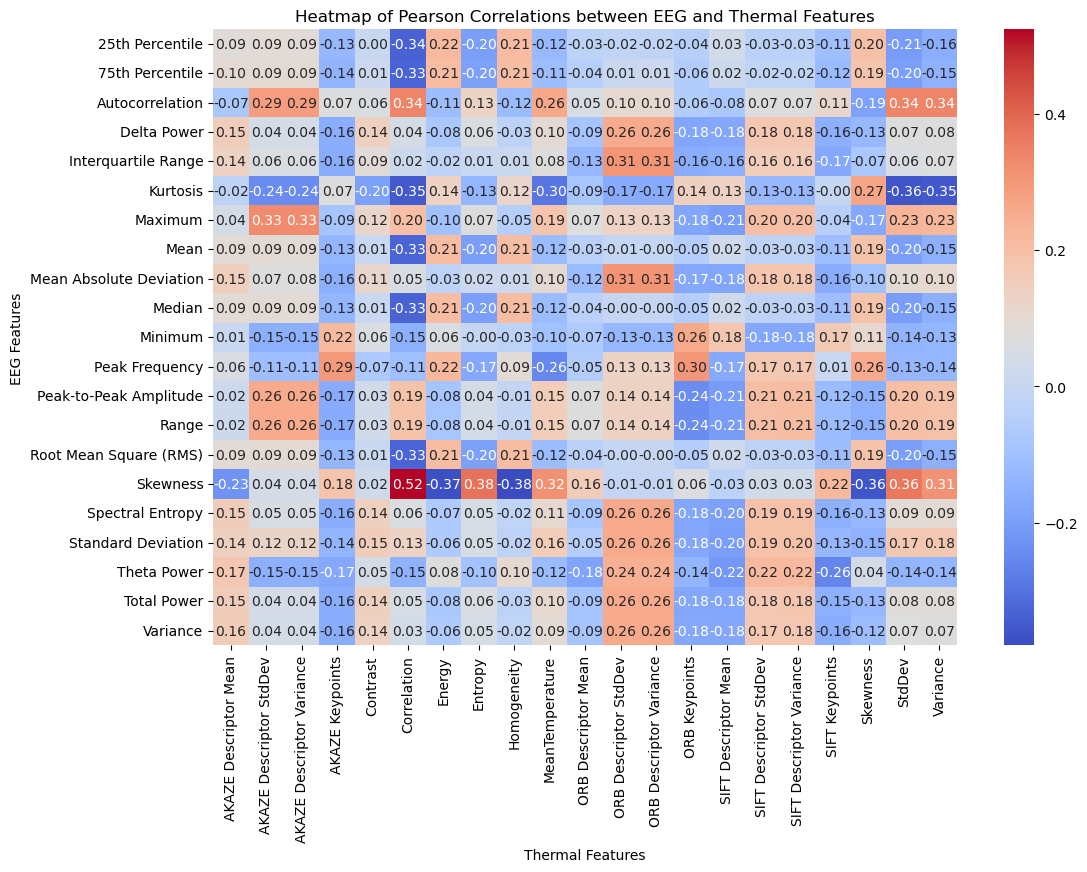

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\ANGRYeeg_features_combined.xlsx"
thermal_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\thermal\Anger_thermal_feature_extracted.xlsx"

# Save paths for correlation results and fused data
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\angrycorrelation_results_eeg_thermal.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\angryfused_data_eeg_thermal.xlsx"

# Load EEG and Thermal features
eeg_features = pd.read_excel(eeg_path)
thermal_features = pd.read_excel(thermal_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
thermal_features.fillna(thermal_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == thermal_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
thermal_features_numeric = thermal_features.select_dtypes(include=['number'])

# Fuse EEG and Thermal Data Together
fused_data = pd.concat([eeg_features_numeric, thermal_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis between EEG and Thermal features
for eeg_col in eeg_features_numeric.columns:
    for thermal_col in thermal_features_numeric.columns:
        try:
            if eeg_features_numeric[eeg_col].nunique() <= 1 or thermal_features_numeric[thermal_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Thermal Feature': thermal_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {thermal_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Thermal Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Heatmap of correlations
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Thermal Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Thermal Features")
    plt.xlabel("Thermal Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\fearfused_data_eeg_thermal.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\fearcorrelation_results_eeg_thermal.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature            Thermal Feature  Pearson_r   P_value
70                 Skewness                    Entropy   0.412080  0.004913
334         Autocorrelation    AKAZE Descriptor StdDev   0.376439  0.010813
335         Autocorrelation  AKAZE Descriptor Variance   0.376058  0.010900
124                 Maximum    AKAZE Descriptor StdDev   0.350708  0.018177
125                 Maximum  AKAZE Descriptor Variance   0.350142  0.018378
67                 Skewness            MeanTemperature   0.297574  0.047118
166                   Range    AKAZE Descriptor StdDev   0.292316  0.051351
313  Peak-to-Peak Amplitude    AKAZE Descriptor StdDev   0.292316  0.051351
314  Peak-to-Peak Amp

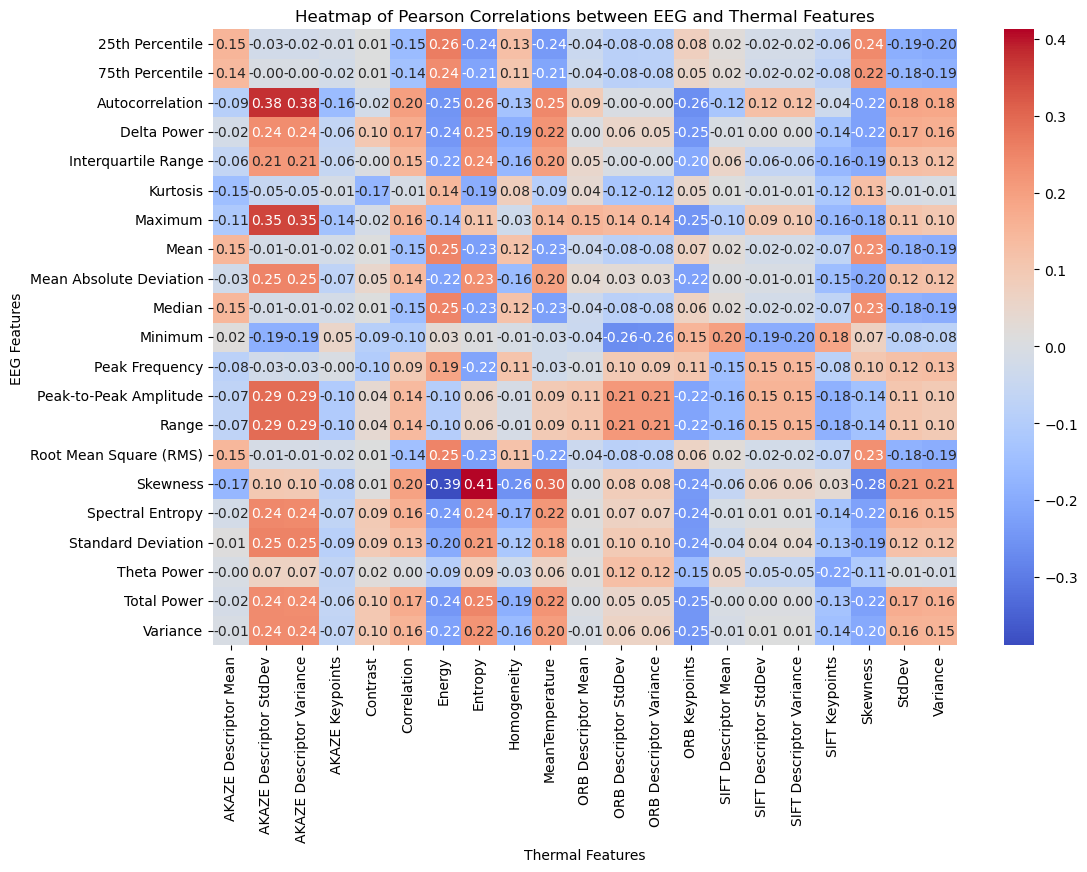

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\FEAReeg_features_combined.xlsx"
thermal_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\thermal\fear_thermal_feature _extracted.xlsx"

# Save paths for correlation results and fused data
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\fearcorrelation_results_eeg_thermal.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\fearfused_data_eeg_thermal.xlsx"

# Load EEG and Thermal features
eeg_features = pd.read_excel(eeg_path)
thermal_features = pd.read_excel(thermal_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
thermal_features.fillna(thermal_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == thermal_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
thermal_features_numeric = thermal_features.select_dtypes(include=['number'])

# Fuse EEG and Thermal Data Together
fused_data = pd.concat([eeg_features_numeric, thermal_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis between EEG and Thermal features
for eeg_col in eeg_features_numeric.columns:
    for thermal_col in thermal_features_numeric.columns:
        try:
            if eeg_features_numeric[eeg_col].nunique() <= 1 or thermal_features_numeric[thermal_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Thermal Feature': thermal_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {thermal_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Thermal Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Heatmap of correlations
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Thermal Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Thermal Features")
    plt.xlabel("Thermal Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\normalfused_data_eeg_thermal.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\normalcorrelation_results_eeg_thermal.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature           Thermal Feature  Pearson_r   P_value
228         75th Percentile     AKAZE Descriptor Mean   0.321500  0.031277
291  Root Mean Square (RMS)     AKAZE Descriptor Mean   0.316912  0.033914
186                  Median     AKAZE Descriptor Mean   0.316271  0.034296
18                     Mean     AKAZE Descriptor Mean   0.314729  0.035231
207         25th Percentile     AKAZE Descriptor Mean   0.310522  0.037889
163                   Range  SIFT Descriptor Variance   0.293372  0.050478
310  Peak-to-Peak Amplitude  SIFT Descriptor Variance   0.293372  0.050478
309  Peak-to-Peak Amplitude    SIFT Descriptor StdDev   0.293166  0.050647
162                   Rang

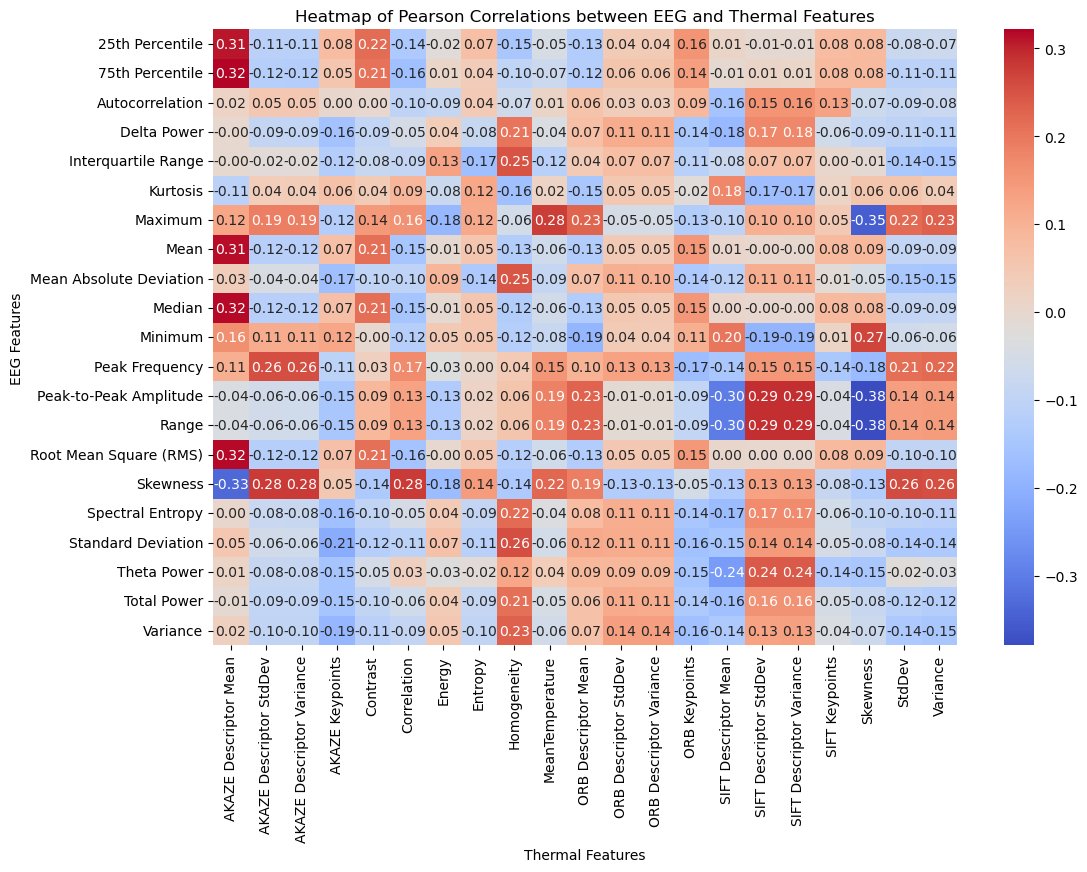

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\NORMALeeg_features_combined.xlsx"
thermal_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\thermal\Normal_thermal_extracted_features.xlsx"

# Save paths for correlation results and fused data
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\normalcorrelation_results_eeg_thermal.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\normalfused_data_eeg_thermal.xlsx"

# Load EEG and Thermal features
eeg_features = pd.read_excel(eeg_path)
thermal_features = pd.read_excel(thermal_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
thermal_features.fillna(thermal_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == thermal_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
thermal_features_numeric = thermal_features.select_dtypes(include=['number'])

# Fuse EEG and Thermal Data Together
fused_data = pd.concat([eeg_features_numeric, thermal_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis between EEG and Thermal features
for eeg_col in eeg_features_numeric.columns:
    for thermal_col in thermal_features_numeric.columns:
        try:
            if eeg_features_numeric[eeg_col].nunique() <= 1 or thermal_features_numeric[thermal_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Thermal Feature': thermal_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {thermal_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Thermal Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Heatmap of correlations
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Thermal Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Thermal Features")
    plt.xlabel("Thermal Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\happyfused_data_eeg_thermal.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\happycorrelation_results_eeg_thermal.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                 EEG Feature          Thermal Feature  Pearson_r   P_value
133                  Minimum                  Entropy   0.348854  0.018842
96                  Kurtosis  ORB Descriptor Variance   0.320544  0.031812
95                  Kurtosis    ORB Descriptor StdDev   0.319861  0.032198
245      Interquartile Range     SIFT Descriptor Mean   0.316647  0.034071
92                  Kurtosis                 Skewness   0.307199  0.040103
392              Theta Power     SIFT Descriptor Mean   0.298192  0.046639
85                  Kurtosis                   Energy   0.294932  0.049208
266  Mean Absolute Deviation     SIFT Descriptor Mean   0.293590  0.050298
350              Total Power

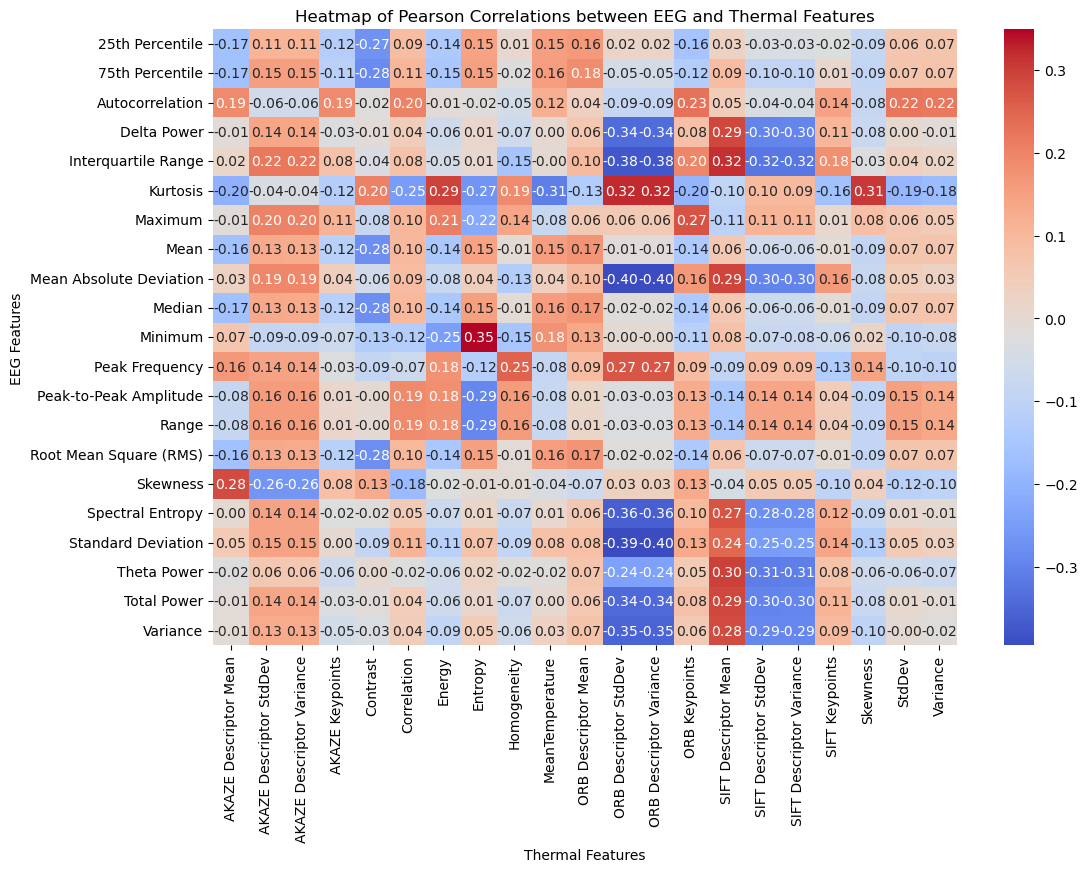

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\HAPPYeeg_features_combined.xlsx"
thermal_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\thermal\happy_thermal_extracted_features.xlsx"

# Save paths for correlation results and fused data
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\happycorrelation_results_eeg_thermal.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\fused_data_eeg_thermal.xlsx"

# Load EEG and Thermal features
eeg_features = pd.read_excel(eeg_path)
thermal_features = pd.read_excel(thermal_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
thermal_features.fillna(thermal_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == thermal_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
thermal_features_numeric = thermal_features.select_dtypes(include=['number'])

# Fuse EEG and Thermal Data Together
fused_data = pd.concat([eeg_features_numeric, thermal_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis between EEG and Thermal features
for eeg_col in eeg_features_numeric.columns:
    for thermal_col in thermal_features_numeric.columns:
        try:
            if eeg_features_numeric[eeg_col].nunique() <= 1 or thermal_features_numeric[thermal_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Thermal Feature': thermal_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {thermal_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Thermal Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Heatmap of correlations
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Thermal Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Thermal Features")
    plt.xlabel("Thermal Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")


✅ Fused data saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\sadfused_data_eeg_thermal.xlsx
✅ Correlation results saved to: C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\sadcorrelation_results_eeg_thermal.xlsx

🔥 Top Correlations by Absolute Pearson’s r:
                EEG Feature           Thermal Feature  Pearson_r   P_value
64                 Skewness                    Energy   0.505313  0.000291
77                 Skewness      SIFT Descriptor Mean   0.423417  0.003022
217         75th Percentile                   Entropy   0.404390  0.004814
175                  Median                   Entropy   0.403336  0.004936
7                      Mean                   Entropy   0.403042  0.004971
280  Root Mean Square (RMS)                   Entropy   0.402964  0.004980
196         25th Percentile                   Entropy   0.401900  0.005107
120                 Maximum    SIFT Descriptor StdDev   0.381589  0.008131
121                 Maximum  SIF

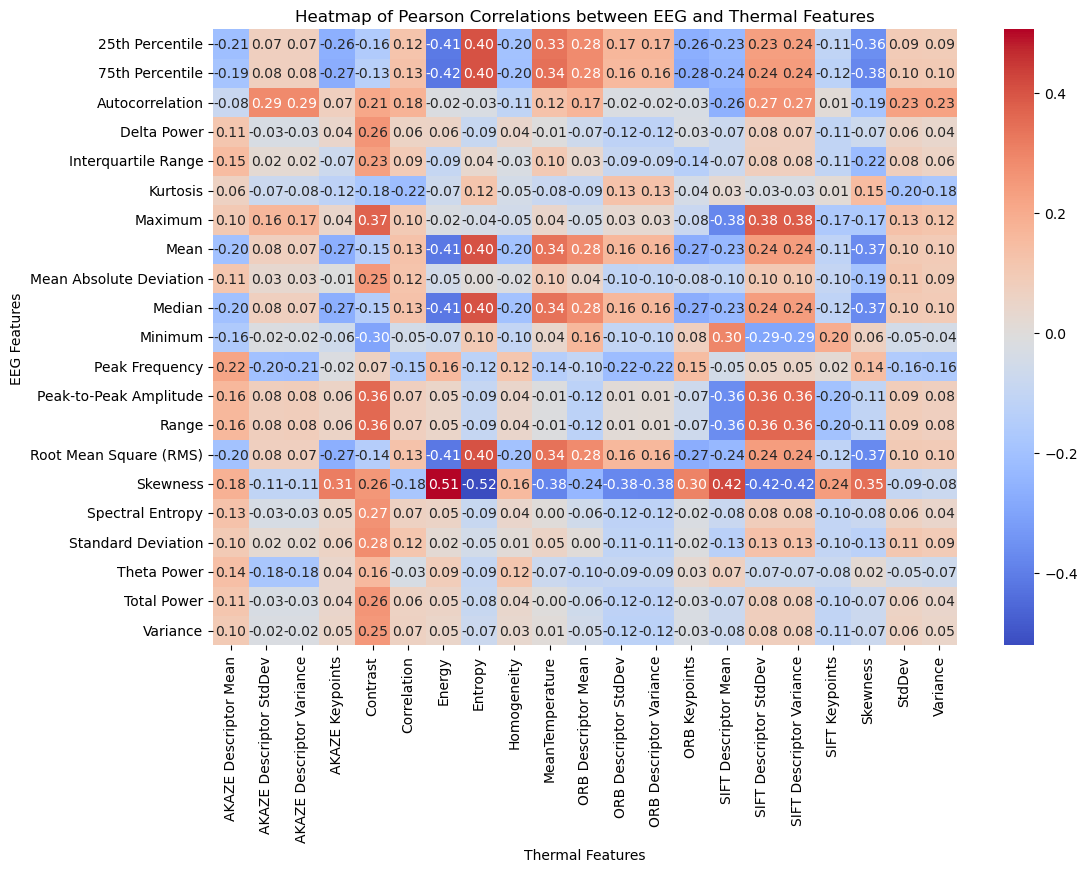

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define file paths
eeg_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\eegemotion\SADeeg_features_combined.xlsx"
thermal_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\thermal\Sad_thermal_extracted_features.xlsx"

# Save paths for correlation results and fused data
correlation_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\sadcorrelation_results_eeg_thermal.xlsx"
fused_data_save_path = r"C:\Users\bibek\Downloads\PROJECT2\correlation2\EEGANDTHERMAL\sadfused_data_eeg_thermal.xlsx"

# Load EEG and Thermal features
eeg_features = pd.read_excel(eeg_path)
thermal_features = pd.read_excel(thermal_path)

# Fill NaN values with column mean
eeg_features.fillna(eeg_features.mean(numeric_only=True), inplace=True)
thermal_features.fillna(thermal_features.mean(numeric_only=True), inplace=True)

# Ensure the number of rows match for correlation
assert eeg_features.shape[0] == thermal_features.shape[0], "Mismatch in number of subjects!"

# Drop non-numeric columns (like file names)
eeg_features_numeric = eeg_features.select_dtypes(include=['number'])
thermal_features_numeric = thermal_features.select_dtypes(include=['number'])

# Fuse EEG and Thermal Data Together
fused_data = pd.concat([eeg_features_numeric, thermal_features_numeric], axis=1)

# Save the fused data
fused_data.to_excel(fused_data_save_path, index=False)
print(f"✅ Fused data saved to: {fused_data_save_path}")

# Initialize correlation metrics storage
correlation_results = []

# Perform correlation analysis between EEG and Thermal features
for eeg_col in eeg_features_numeric.columns:
    for thermal_col in thermal_features_numeric.columns:
        try:
            if eeg_features_numeric[eeg_col].nunique() <= 1 or thermal_features_numeric[thermal_col].nunique() <= 1:
                continue  # Skip constant columns
            
            # Compute Pearson correlation
            pearson_r, p_value = pearsonr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute Spearman correlation
            spearman_rho, _ = spearmanr(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            
            # Compute R-squared
            r_squared = pearson_r ** 2
            
            # Compute MAE & RMSE
            mae = mean_absolute_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col])
            rmse = np.sqrt(mean_squared_error(eeg_features_numeric[eeg_col], thermal_features_numeric[thermal_col]))

            # Store results
            correlation_results.append({
                'EEG Feature': eeg_col,
                'Thermal Feature': thermal_col,
                'Pearson_r': pearson_r,
                'P_value': p_value,
                'Spearman_rho': spearman_rho,
                'R_squared': r_squared,
                'MAE': mae,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error processing {eeg_col} vs {thermal_col}: {e}")

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Save correlation results to Excel
correlation_df.to_excel(correlation_save_path, index=False)
print(f"✅ Correlation results saved to: {correlation_save_path}")

# Display correlation metrics
print("\n🔥 Top Correlations by Absolute Pearson’s r:")
print(correlation_df[['EEG Feature', 'Thermal Feature', 'Pearson_r', 'P_value']]
      .sort_values(by='Pearson_r', ascending=False)
      .head(10))

# 🔥 Heatmap of correlations
if not correlation_df.empty:
    heatmap_data = correlation_df.pivot(index='EEG Feature', columns='Thermal Feature', values='Pearson_r')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap of Pearson Correlations between EEG and Thermal Features")
    plt.xlabel("Thermal Features")
    plt.ylabel("EEG Features")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("❌ No valid correlations found.")
